# **Expected Goal (xG)**
Expected Goals (xG) is a metric designed to measure the probability of a shot resulting in a goal.
An xG model uses historical information from thousands of shots with similar characteristics to estimate the likelihood of a goal on a scale between 0 and 1.
For example, a shot with an xG value of 0.2 is one that we would generally expect to be converted twice in every 10 attempts.


# **1. Data Loading and Pre-Processing**

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import json
#Plotting
import matplotlib.pyplot as plt
#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf
import time

from mplsoccer import PyPizza, add_image, FontManager
from mplsoccer import Pitch, VerticalPitch

In [13]:
# Loading data for the German Bundesliga Season 23-24 
file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Season Data\Whoscored Season Data\Bundesliga_2324\GER123-24.csv'
event_Germany= pd.read_csv(file_path, low_memory=False)


In [14]:
# Loading data for the French Ligue 1 Season 23-24
file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Season Data\Whoscored Season Data\Ligue 1 2023-24\Ligue1_23-24.csv'
event_France= pd.read_csv(file_path, low_memory=False)

In [15]:
# Loading data for the Italy Serie A Season 23-24
file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Season Data\Whoscored Season Data\Serie A 2324\ITA123-24.csv'
event_Italy= pd.read_csv(file_path, low_memory=False)


In [16]:
# Loading data for the Spain La Liga Season 24-25
file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Season Data\Whoscored Season Data\LaLiga 24-25\SPA1-2425.csv'
event_Spain= pd.read_csv(file_path, low_memory=False)

In [17]:
# Loading data for the English Premier league 23-24
file_path = r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Season Data\Whoscored Season Data\Scraper\Prem23-24.csv'
event_England = pd.read_csv(file_path, low_memory=False)

In [18]:
# Combining all dataframes
event_data = pd.concat([event_England, event_France, event_Germany, event_Italy, event_Spain])

event_data = event_data.reset_index(drop=True)

event_data

,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,...,Away,Score,Date,team,Match Name,prog_carry,xThreat,xThreat_gen,index,url
0,3.5,0.0,1.0,30,44.5,64.0,0.0,1,Carry,Successful,...,NaN,NaN,NaN,NaN,NaN,False,-0.000392,0.000000,NaN,NaN
1,432.0,37.0,57.0,32,47.6,87.5,37.0,1,Pass,Successful,...,Crystal Palace,0 : 1,2023-09-30,Manchester Utd,Manchester UtdCrystal Palace,False,0.000370,0.000370,NaN,NaN
2,431.0,37.0,56.0,32,43.0,62.2,37.0,1,Pass,Successful,...,Crystal Palace,0 : 1,2023-09-30,Manchester Utd,Manchester UtdCrystal Palace,False,-0.000288,0.000000,NaN,NaN
3,430.0,37.0,55.0,32,31.5,65.5,37.0,1,Pass,Successful,...,Crystal Palace,0 : 1,2023-09-30,Manchester Utd,Manchester UtdCrystal Palace,False,0.002212,0.002212,NaN,NaN
4,429.0,37.0,55.0,32,31.5,65.5,37.0,1,BallRecovery,Successful,...,Crystal Palace,0 : 1,2023-09-30,Manchester Utd,Manchester UtdCrystal Palace,False,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817147,479.0,52.0,41.0,839,4.6,59.9,53.0,2,Pass,Successful,...,Real Valladolid,5 : 1,2025-02-01,Villareal,NaN,False,0.000091,0.000091,895.0,https://1xbet.whoscored.com/Matches/1821635/Li...
2817148,798.0,0.0,0.0,58,0.0,0.0,4.0,14,End,Successful,...,Real Valladolid,5 : 1,2025-02-01,Real Valladolid,NaN,False,NaN,NaN,1522.0,https://1xbet.whoscored.com/Matches/1821635/Li...
2817149,855.0,0.0,0.0,839,0.0,0.0,4.0,14,End,Successful,...,Real Valladolid,5 : 1,2025-02-01,Villareal,NaN,False,NaN,NaN,1523.0,https://1xbet.whoscored.com/Matches/1821635/Li...
2817150,1.0,0.0,0.0,839,0.0,0.0,0.0,16,FormationSet,Successful,...,Real Valladolid,5 : 1,2025-02-01,Villareal,NaN,False,NaN,NaN,1524.0,https://1xbet.whoscored.com/Matches/1821635/Li...


### Explanation of the Data

The raw Events DataFrame has sixty eight features (columns). Each row consists of a event.

Each feature in the datasets has the following definitions and data types, as per the official documentation:

| No.      | Feature                    | Data Type     | Description                                            |
|----------|----------------------------|---------------|--------------------------------------------------------|
| 1.       | `eventId`                  | float64       |                                                        |
| 2.       | `minute`                   | float64       |     minute of the match in which the event took place  |
| 3.       | `second`                   | float64       |                                                        |
| 4.       | `teamId`                   | int64         |                                                        |
| 5.       | `x`                        | float64       |           x coordinate of the pitch                    |
| 6.       | `y`                        | float64       |           y coordinate of the pitch                    |
| 7.       | `expandedMinute`           | float64       |                                                        |
| 8.       | `period`                   | object        |                                                        |
| 9.       | `type`                     | object        |                                                        |
| 10.      | `outcomeType`              | object        |                                                        |
| 11.      | `qualifiers`               | object        |                                                        |
| 12.      | `satisfiedEventsTypes`     | object        |                                                        |
| 13.      | `isTouch`                  | bool          |                                                        |
| 14.      | `playerId`                 | float64       |                                                        |
| 15.      | `Name`                     | object        |                                                        |
| 16.      | `endX`                     | float64       |       ending x coordinate of action on the pitch       |
| 17.      | `endY`                     | float64       |       ending y coordinate of action on the pitch       |
| 18.      | `blockedX`                 | float64       |                                                        |
| 19.      | `blockedY`                 | float64       |                                                        |
| 20.      | `goalMouthZ`               | float64       |                                                        |
| 21.      | `goalMouthY`               | float64       |                                                        |
| 22.      | `isShot`                   | object        |                                                        |
| 23.      | `relatedEventId`           | float64       |                                                        |
| 24.      | `relatedPlayerId`          | float64       |                                                        |
| 25.      | `isGoal`                   | object        |                                                        |
| 26.      | `cardType`                 | object        |                                                        |
| 27.      | `isOwnGoal`                | object        |                                                        |
| 28.      | `cumulative_mins`          | float64       |                                                        |
| 29.      | `id`                       | float64       |                                                        |
| 30.      | `OptaId`                   | float64       |                                                        |
| 31.      | `Home`                     | object        |                                                        |
| 32.      | `Away`                     | object        |                                                        |
| 33.      | `Score`                    | object        |                                                        |
| 34.      | `Date`                     | object        |                                                        |
| 35.      | `team`                     | object        |                                                        |
| 36.      | `Match Name`               | object        |                                                        |
| 37.      | `prog_carry`               | object        |                                                        |
| 38.      | `xThreat`                  | float64       |                                                        |
| 39.      | `xThreat_gen`              | float64       |                                                        |
| 40.      | `index`                    | float64       |                                                        |
| 41.      | `url`                      | object        |                                                        |



### Filtering and Preprocessing  Shots Data
The goal is filter out all 'Shot' events from open play. Preprocess to find our shot type(body part) and goal location

In [41]:
# Filtering out all the shots from our dataset
shots_df = event_data[event_data['isShot']==True].reset_index(drop=True)

In [42]:
# Add one hot encoded cols for shot from right,left and head
shots_df["right_shot"] = 0
goal_id = [12]
for index, row in shots_df.iterrows():
    if len(set(goal_id).intersection(eval(row["satisfiedEventsTypes"]))) > 0:
        shots_df.loc[index, 'right_shot'] = 1

shots_df["left_shot"] = 0
goal_id = [13]
for index, row in shots_df.iterrows():
    if len(set(goal_id).intersection(eval(row["satisfiedEventsTypes"]))) > 0:
        shots_df.loc[index, 'left_shot'] = 1

shots_df["head_shot"] = 0
goal_id = [14]
for index, row in shots_df.iterrows():
    if len(set(goal_id).intersection(eval(row["satisfiedEventsTypes"]))) > 0:
        shots_df.loc[index, 'head_shot'] = 1

### Features Selected for Model Building

    1. X, Y Coordinates of Shot
    
    2. Angle of Shot from Goal
    
    3. Body Part Used for Shooting (Left or Right Foot, Header )

    4. Position of Shot in the Goal (z,y coordinate)



In [43]:
# Create data for model
shots_model=shots_df[["x","y","goalMouthZ","goalMouthY","type","right_shot","left_shot","head_shot"]]
shots_model

,x,y,goalMouthZ,goalMouthY,type,right_shot,left_shot,head_shot
0,90.5,46.0,19.0,47.4,SavedShot,1,0,0
1,96.5,42.3,51.4,44.4,MissedShots,0,0,1
2,80.5,67.8,19.0,50.1,SavedShot,0,1,0
3,89.2,63.7,30.4,48.3,Goal,1,0,0
4,74.8,39.9,13.9,57.8,MissedShots,1,0,0
...,...,...,...,...,...,...,...,...
41162,96.4,46.8,70.8,48.4,MissedShots,0,0,1
41163,80.9,51.0,2.5,46.0,Goal,0,1,0
41164,83.6,62.3,19.0,51.1,SavedShot,0,1,0
41165,88.4,42.1,65.3,50.8,MissedShots,1,0,0


In [44]:
# Calculate Angle
for i, shot in shots_model.iterrows():
    goal_x = 100  # Goal line constant
    goal_y_center = 50  # Center of the goal
    goal_width = 6.66 # Width of the goal

    # Calculate the angle from the goalmouth
    x_dist = (goal_x - shots_model.at[i, 'x']) 
    y_dist = abs(shots_model.at[i, 'y'] - goal_y_center) 

    # Angle calculation
    numerator = goal_width * x_dist
    denominator = x_dist**2 + y_dist**2 - (goal_width / 2) ** 2
    goalmouth_angle = np.arctan(numerator / denominator)

    if goalmouth_angle < 0:
        goalmouth_angle += np.pi  # Adjust negative angles

    shots_model.at[i, 'Goalmouth_Angle'] = goalmouth_angle 

shots_model

C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\887752787.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_model.at[i, 'Goalmouth_Angle'] = goalmouth_angle


,x,y,goalMouthZ,goalMouthY,type,right_shot,left_shot,head_shot,Goalmouth_Angle
0,90.5,46.0,19.0,47.4,SavedShot,1,0,0,0.586759
1,96.5,42.3,51.4,44.4,MissedShots,0,0,1,0.368032
2,80.5,67.8,19.0,50.1,SavedShot,0,1,0,0.187100
3,89.2,63.7,30.4,48.3,Goal,1,0,0,0.240537
4,74.8,39.9,13.9,57.8,MissedShots,1,0,0,0.227194
...,...,...,...,...,...,...,...,...,...
41162,96.4,46.8,70.8,48.4,MissedShots,0,0,1,1.103050
41163,80.9,51.0,2.5,46.0,Goal,0,1,0,0.344323
41164,83.6,62.3,19.0,51.1,SavedShot,0,1,0,0.260863
41165,88.4,42.1,65.3,50.8,MissedShots,1,0,0,0.393899


In [45]:
# Create is_goal binary column
shots_model['is_goal'] = shots_model['type'].apply(lambda x: 1 if x == 'Goal' else 0)
shots_model.drop(columns=['type'], inplace=True)

C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\2592586215.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_model['is_goal'] = shots_model['type'].apply(lambda x: 1 if x == 'Goal' else 0)
C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\2592586215.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_model.drop(columns=['type'], inplace=True)


In [46]:
# Checking data types
shots_model.dtypes

x                  float64
y                  float64
goalMouthZ         float64
goalMouthY         float64
right_shot           int64
left_shot            int64
head_shot            int64
Goalmouth_Angle    float64
is_goal              int64
dtype: object

In [47]:
# Check for any missing values
shots_model.isna().sum()

x                  0
y                  0
goalMouthZ         0
goalMouthY         0
right_shot         0
left_shot          0
head_shot          0
Goalmouth_Angle    0
is_goal            0
dtype: int64

# **2. Data Exploration**



In [48]:
shots_model

,x,y,goalMouthZ,goalMouthY,right_shot,left_shot,head_shot,Goalmouth_Angle,is_goal
0,90.5,46.0,19.0,47.4,1,0,0,0.586759,0
1,96.5,42.3,51.4,44.4,0,0,1,0.368032,0
2,80.5,67.8,19.0,50.1,0,1,0,0.187100,0
3,89.2,63.7,30.4,48.3,1,0,0,0.240537,1
4,74.8,39.9,13.9,57.8,1,0,0,0.227194,0
...,...,...,...,...,...,...,...,...,...
41162,96.4,46.8,70.8,48.4,0,0,1,1.103050,0
41163,80.9,51.0,2.5,46.0,0,1,0,0.344323,1
41164,83.6,62.3,19.0,51.1,0,1,0,0.260863,0
41165,88.4,42.1,65.3,50.8,1,0,0,0.393899,0


## (i) Most frequent Shot Locations

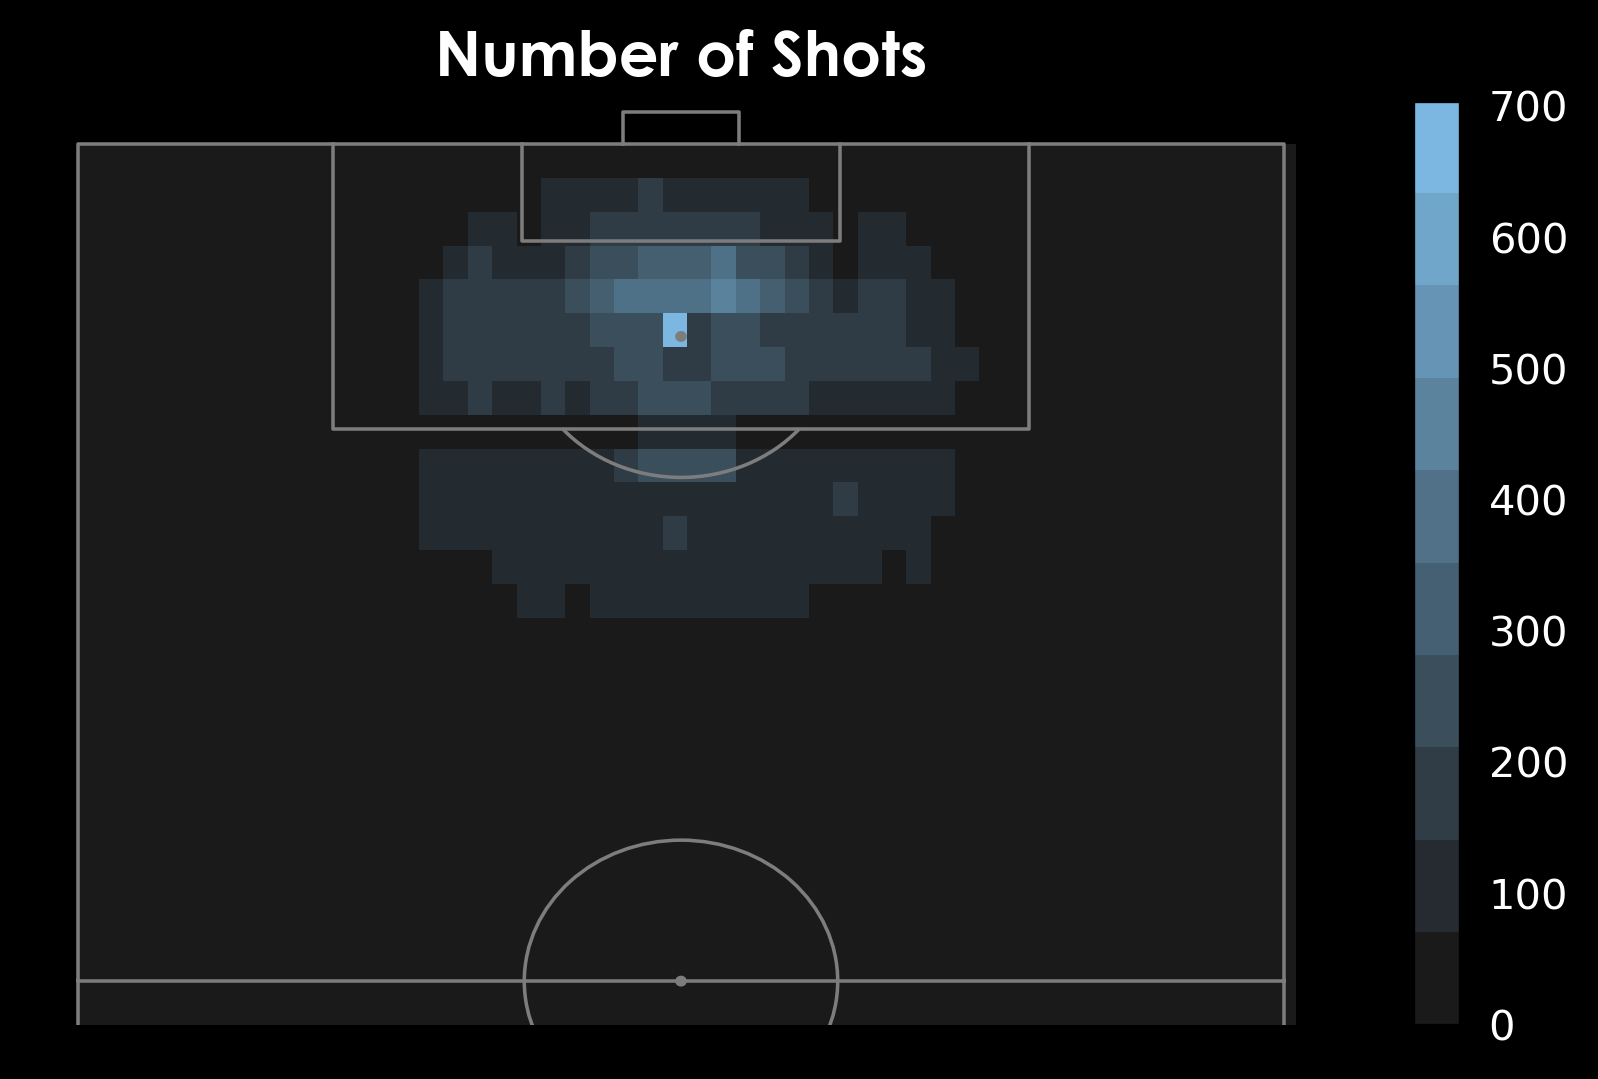

In [50]:
# Create the figure and axis
fig = plt.figure(figsize=(7, 4), dpi=300)
ax = plt.subplot(111)

# Create a VerticalPitch 
pitch = VerticalPitch(
    pitch_color='#1A1A1A',
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    line_color='#7E7D7D',
    half=True
)

pitch.draw(ax=ax)
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

# Two dimensional histogram
H_Shot = np.histogram2d(shots_model['x'],  shots_model['y'], bins=50, range=[[0, 100], [0, 100]])


from matplotlib.colors import LinearSegmentedColormap  


pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#1A1A1A', '#7BB7E0'], N=10)
# Heatmap
pos=ax.imshow(H_Shot[0],
              extent=[-1, 100, 100, -1],
              aspect='auto',
              cmap=pearl_earring_cmap
             )

# Colour bar
cbar = fig.colorbar(pos, ax=ax)
cbar.ax.tick_params(labelcolor='white')

# Title
ax.set_title('Number of Shots',
             loc='center',
             color='white', 
             fontweight='bold',
             fontfamily='Century Gothic',
             fontsize=15,
            )

plt.show()

#### Majority of shots come from inside the penalty box and in front of the goal. Shots from the flanks are less due to tight angle. Shots from outside the box are attempted less frequently.

## (ii) Most frequent Goal Locations

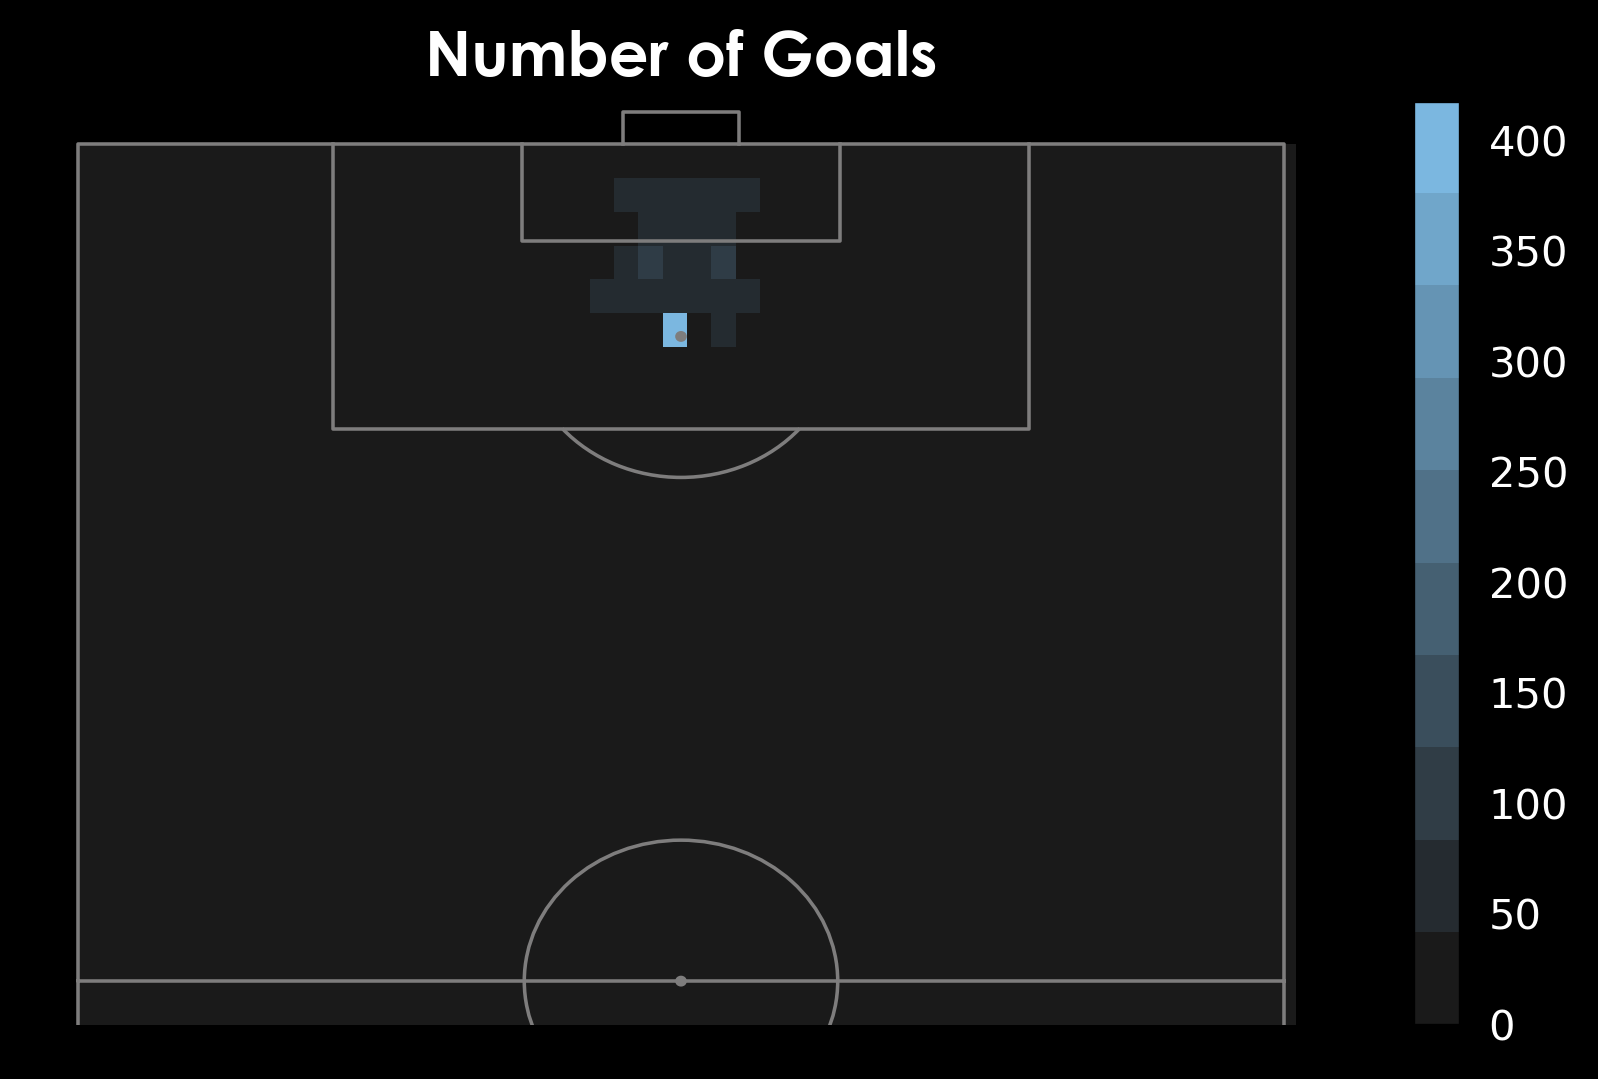

In [51]:
# Create the figure and axis
fig = plt.figure(figsize=(7, 4), dpi=300)
ax = plt.subplot(111)

# Create a VerticalPitch 
pitch = VerticalPitch(
    pitch_color='#1A1A1A',
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    line_color='#7E7D7D',
    half=True
)

pitch.draw(ax=ax)
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

# Two dimensional histogram
H_Goal = np.histogram2d(shots_model[shots_model["is_goal"] == True]['x'],  shots_model[shots_model["is_goal"] == True]['y'], bins=50, range=[[0, 100], [0, 100]])


from matplotlib.colors import LinearSegmentedColormap  


pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#1A1A1A', '#7BB7E0'], N=10)
# Heatmap
pos=ax.imshow(H_Goal[0],
              extent=[-1, 100, 100, -1],
              aspect='auto',
              cmap=pearl_earring_cmap
             )

# Colour bar
cbar = fig.colorbar(pos, ax=ax)
cbar.ax.tick_params(labelcolor='white')

# Title
ax.set_title('Number of Goals',
             loc='center',
             color='white', 
             fontweight='bold',
             fontfamily='Century Gothic',
             fontsize=15,
            )

plt.show()

#### Most goals come from inside the box near to the goal. As distance increases and angle from the goal tightens, the number of goals become less frequent in that area. Goals from outside the box are very rare and difficult to execute.



## (iii) Areas where probability of a shot turning into a goal is high

C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\2986516414.py:26: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0],


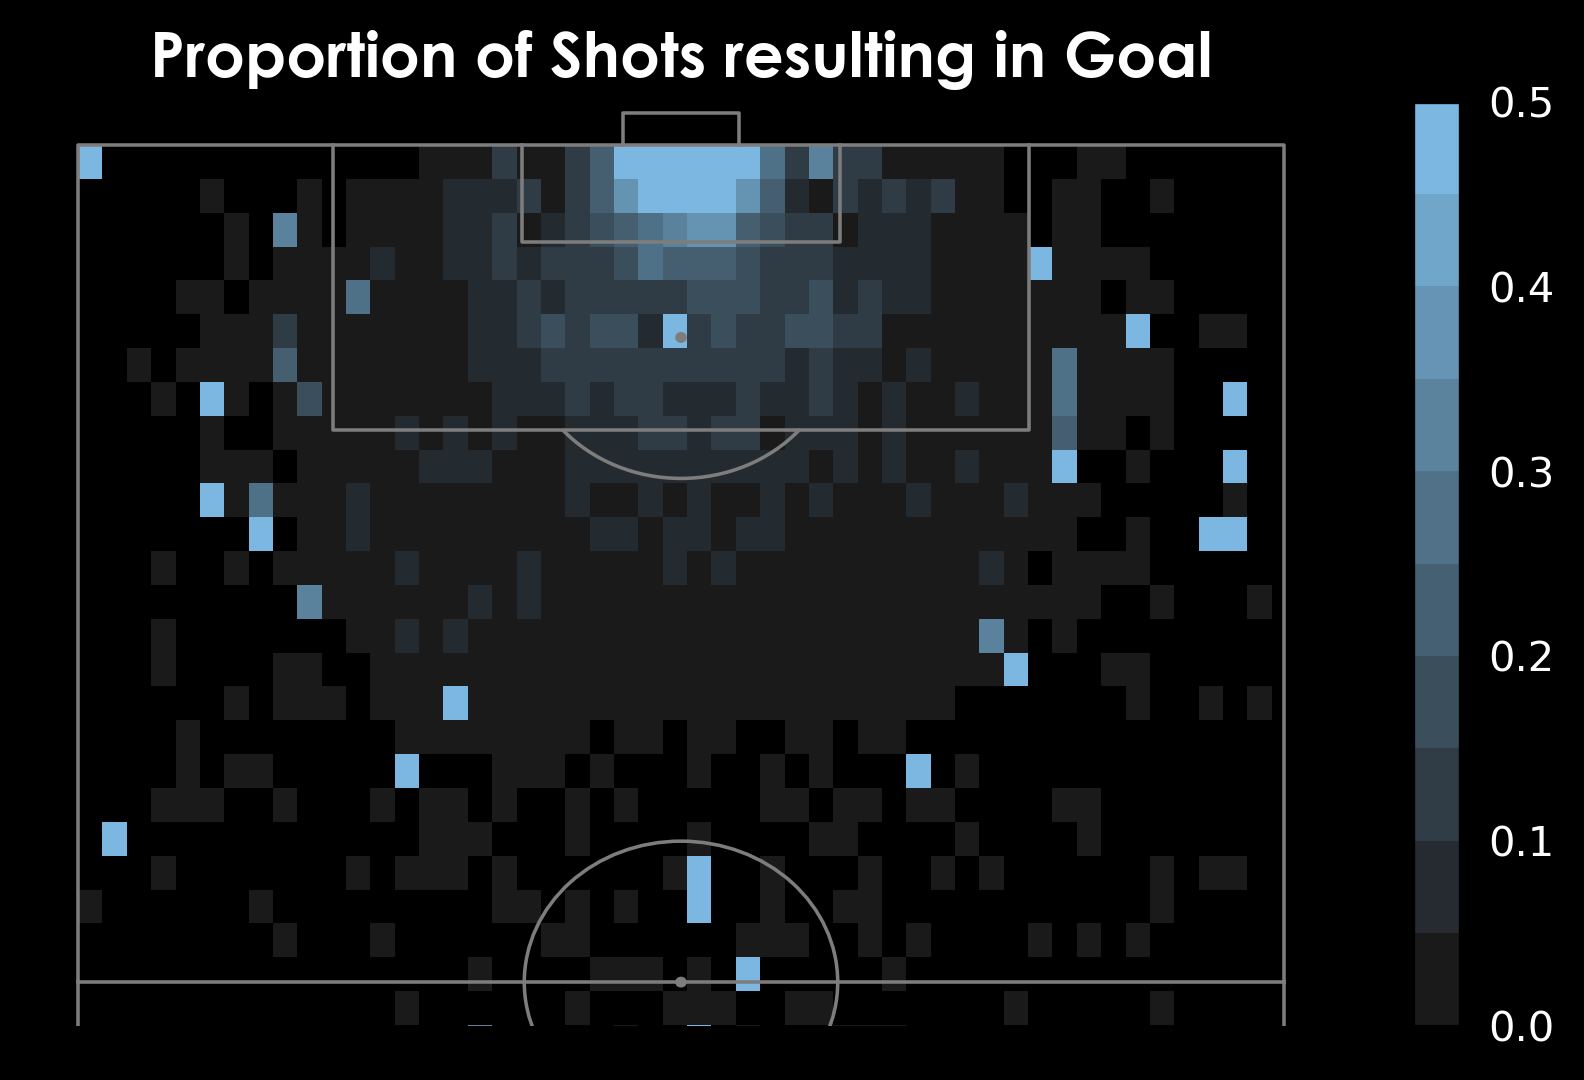

In [53]:

# Create the figure and axis
fig = plt.figure(figsize=(7, 4), dpi=300)
ax = plt.subplot(111)

# Create a VerticalPitch 
pitch = VerticalPitch(
    pitch_color='#1A1A1A',
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    line_color='#7E7D7D',
    half=True
)

pitch.draw(ax=ax)
fig.set_facecolor('black')
ax.patch.set_facecolor('black')


from matplotlib.colors import LinearSegmentedColormap  


pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#1A1A1A', '#7BB7E0'], N=10)
# Heatmap
pos=ax.imshow(H_Goal[0]/H_Shot[0],
              extent=[-1, 100, 100, -1],
              aspect='auto',
              cmap=pearl_earring_cmap,vmin=0, vmax=0.5
             )

# Colour bar
cbar = fig.colorbar(pos, ax=ax)
cbar.ax.tick_params(labelcolor='white')

# Title
ax.set_title('Proportion of Shots resulting in Goal',
             loc='center',
             color='white', 
             fontweight='bold',
             fontfamily='Century Gothic',
             fontsize=15,
            )

plt.show()


#### Clearly visible that shots in front of goalmouth nearer to the goal have high probability of turning into a goal. But we can also see that there are some spots with unusually high probability outside the pen box. This is because our calculation of 

#### Probability of Scoring from a position = Total Number of goals from the spot / Total number of shots from the spot 

#### So from spots which are far from goal,less shots maybe attempted say 5 and one of them results in a goal. This gives a probaility of 20% of scoring from the position. Hence, the high probability goal scoring spots in some unusual areas is which clearly doens't translate to real world football. These are treated as outliers and we will remove them.



### Remove these outlier spots

Change the probability of goals scored from x(from goalmouth) < 80 m , and goals scored from  65 > y > 35 m, to have a probability of scoring equal to zero.

In [54]:
shots_model_filtered =shots_model.copy()
shots_model_filtered.loc[(shots_model_filtered['x'] < 80) | (shots_model_filtered['y'] < 35) | (shots_model_filtered['y'] > 65), 'is_goal'] = 0

In [55]:
# Check before and after outlier removal
print('No. Goals in the DataFrame BEFORE outlier removal: {}'.format(len(shots_model[shots_model['is_goal'] == 1])))
print('No. Goals in the DataFrame AFTER outlier removal: {}\n'.format(len(shots_model_filtered[shots_model_filtered['is_goal'] == 1])))

print('Difference in counts BEFORE and AFTER outlier removal: {}\n'.format(len(shots_model_filtered[shots_model_filtered['is_goal'] == 1]) - len(shots_model[shots_model['is_goal'] == 1])))

No. Goals in the DataFrame BEFORE outlier removal: 4556
No. Goals in the DataFrame AFTER outlier removal: 3717

Difference in counts BEFORE and AFTER outlier removal: -839



C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\427823310.py:29: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0],


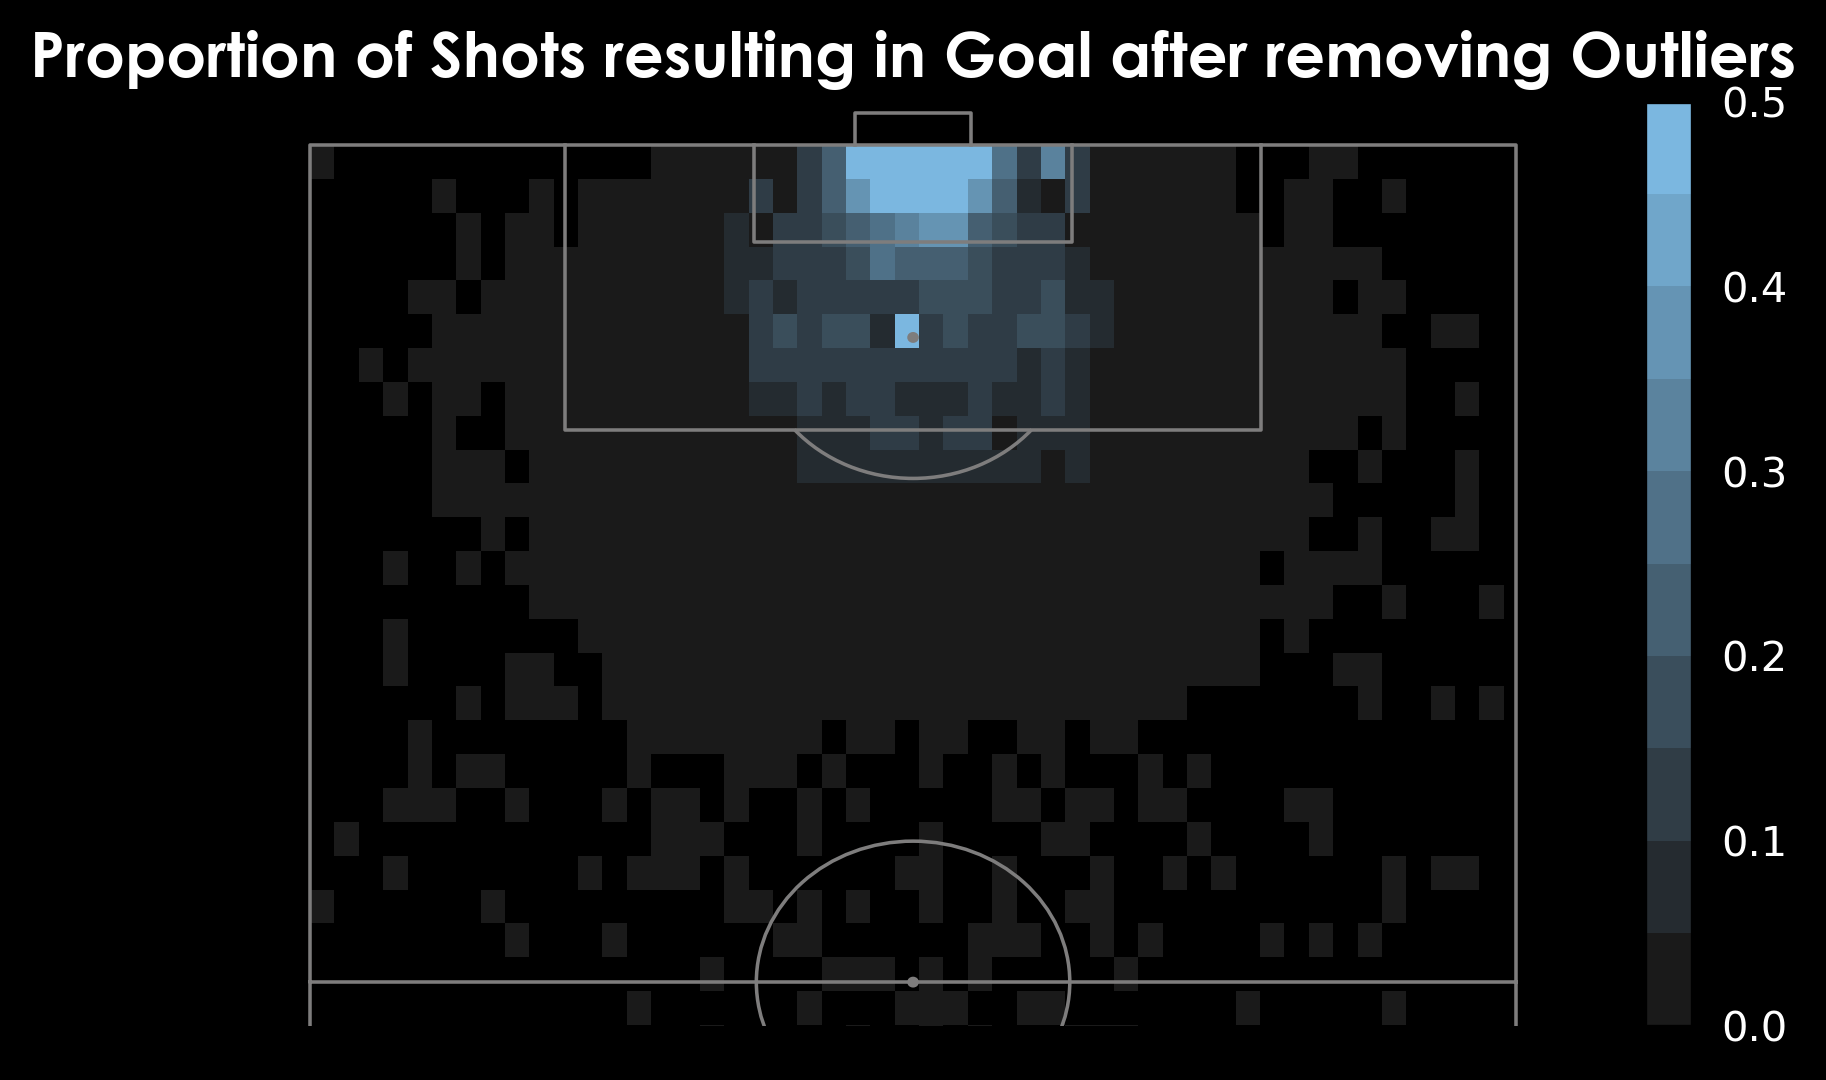

In [56]:
# Create the figure and axis
fig = plt.figure(figsize=(7, 4), dpi=300)
ax = plt.subplot(111)

# Create a VerticalPitch 
pitch = VerticalPitch(
    pitch_color='#1A1A1A',
    pitch_type='opta',
    goal_type='box',
    linewidth=.85,
    line_color='#7E7D7D',
    half=True
)

pitch.draw(ax=ax)
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

from matplotlib.colors import LinearSegmentedColormap  


pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#1A1A1A', '#7BB7E0'], N=10)
# Heatmap

# Two dimensional histogram new after outlier removal
H_Goal = np.histogram2d(shots_model_filtered[shots_model_filtered["is_goal"] == True]['x'],  shots_model_filtered[shots_model_filtered["is_goal"] == True]['y'], bins=50, range=[[0, 100], [0, 100]])

pos=ax.imshow(H_Goal[0]/H_Shot[0],
              extent=[-1, 100, 100, -1],
              aspect='auto',
              cmap=pearl_earring_cmap,vmin=0, vmax=0.5
             )

# Colour bar
cbar = fig.colorbar(pos, ax=ax)
cbar.ax.tick_params(labelcolor='white')

# Title
ax.set_title('Proportion of Shots resulting in Goal after removing Outliers',
             loc='center',
             color='white', 
             fontweight='bold',
             fontfamily='Century Gothic',
             fontsize=15,
            )

plt.show()

## (iv) Goals and Shots from Right Foot vs  Left Foot

In [57]:
shots_model_filtered

,x,y,goalMouthZ,goalMouthY,right_shot,left_shot,head_shot,Goalmouth_Angle,is_goal
0,90.5,46.0,19.0,47.4,1,0,0,0.586759,0
1,96.5,42.3,51.4,44.4,0,0,1,0.368032,0
2,80.5,67.8,19.0,50.1,0,1,0,0.187100,0
3,89.2,63.7,30.4,48.3,1,0,0,0.240537,1
4,74.8,39.9,13.9,57.8,1,0,0,0.227194,0
...,...,...,...,...,...,...,...,...,...
41162,96.4,46.8,70.8,48.4,0,0,1,1.103050,0
41163,80.9,51.0,2.5,46.0,0,1,0,0.344323,1
41164,83.6,62.3,19.0,51.1,0,1,0,0.260863,0
41165,88.4,42.1,65.3,50.8,1,0,0,0.393899,0


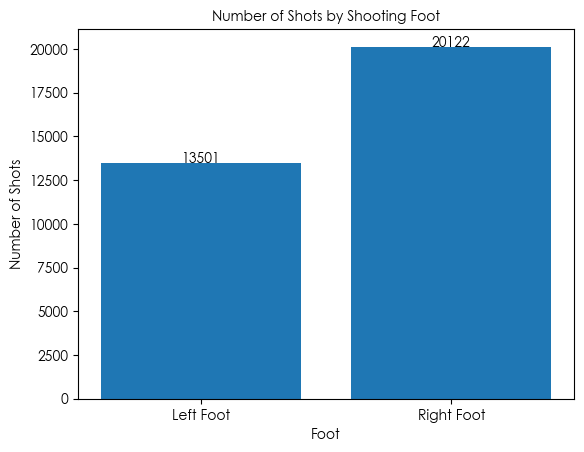

In [58]:
# Count the number of shots  by left foot and right foot
left_foot_shots = shots_model_filtered['left_shot'].sum()
right_foot_shots= shots_model_filtered['right_shot'].sum()

fontliga ="Century Gothic"

# Plot the results
labels = ['Left Foot', 'Right Foot']
values = [left_foot_shots, right_foot_shots]

plt.bar(labels, values)
plt.title('Number of Shots by Shooting Foot',font=fontliga)
plt.xlabel('Foot',font=fontliga)
plt.ylabel('Number of Shots',font=fontliga)

plt.xticks(fontsize=10, fontname="Century Gothic", color='black')
plt.yticks(fontsize=10, fontname="Century Gothic", color='black')

# Add text labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.25, str(v), color='black', ha='center',font=fontliga)
    
plt.show()

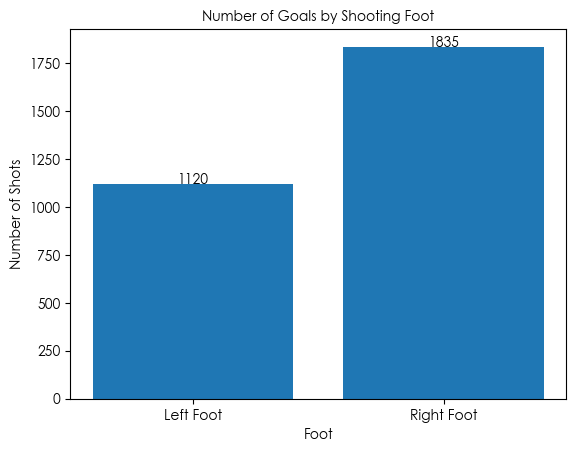

In [59]:
# Count the number of goals scored by left foot and right foot
left_foot_goals = shots_model_filtered[shots_model_filtered['is_goal']== 1]['left_shot'].sum()
right_foot_goals = shots_model_filtered[shots_model_filtered['is_goal']== 1]['right_shot'].sum()

# Plot the results
labels = ['Left Foot', 'Right Foot']
values = [left_foot_goals, right_foot_goals]

plt.bar(labels, values)
plt.title('Number of Goals by Shooting Foot',font=fontliga)
plt.xlabel('Foot',font=fontliga)
plt.ylabel('Number of Shots',font=fontliga)

plt.xticks(fontsize=10, fontname="Century Gothic", color='black')
plt.yticks(fontsize=10, fontname="Century Gothic", color='black')

# Add text labels to the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.25, str(v), color='black', ha='center',font=fontliga)
    
plt.show()



## (v) Inspecting the Class Imbalance

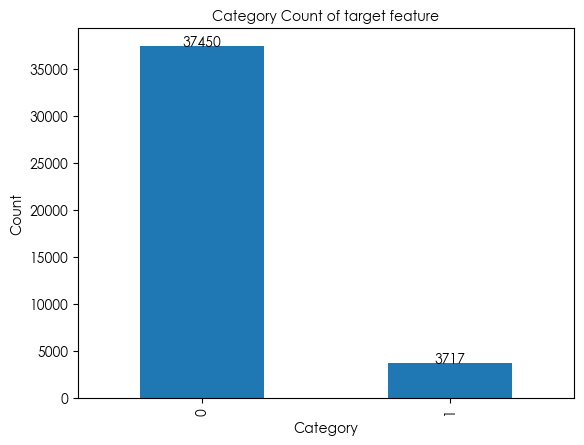

In [60]:
# Get the counts of each category
counts = shots_model_filtered['is_goal'].value_counts()

# Create a bar plot
counts.plot.bar()

plt.title('Category Count of target feature',font=fontliga)
plt.xlabel('Category',font=fontliga)
plt.ylabel('Count',font=fontliga)
plt.xticks(fontsize=10, fontname="Century Gothic", color='black')
plt.yticks(fontsize=10, fontname="Century Gothic", color='black')

# Add text labels to the bars
for i, v in enumerate(counts):
    plt.text(i, v + 0.25, str(v), color='black', ha='center',font=fontliga)
# Display the plot
plt.show()

# **3. Model Training**

In [149]:
# Creating a dataframe containing all the required features
X = shots_model_filtered[['x','y','goalMouthZ','goalMouthY','right_shot','left_shot','head_shot','Goalmouth_Angle']]

# Scaling the Angle column features in our data set
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_continuous = X[['x','y','goalMouthZ','goalMouthY','Goalmouth_Angle']] # select only continuous columns
X_scaled = scaler.fit_transform(X_continuous)

X[['x','y','goalMouthZ','goalMouthY','Goalmouth_Angle']] = X_scaled

y = shots_model_filtered['is_goal']

import joblib
joblib.dump(scaler, 'scaler_features.pkl')

C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\84348046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['x','y','goalMouthZ','goalMouthY','Goalmouth_Angle']] = X_scaled


['scaler_features.pkl']

## **Model 1: Logistic Regression using sklearn**

In the context of binary classification using logistic regression, the model is essentially a simple linear model followed by a sigmoid activation function. The logistic regression model predicts probabilities (between 0 and 1), which in our case is interpreted as probability of shot resulting into a goal.

In [65]:
# Importing the libraries required for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

In [66]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [67]:
# Determine scale_pos_weight based on class imbalance
count_class_0, count_class_1 = y_train.value_counts()
print ('Shot in Training Data: ', count_class_0)
print ('Goals in Training Data: ', count_class_1)

Shot in Training Data:  28087
Goals in Training Data:  2788


In [68]:
# Class imbalance in training data
weight_0 = count_class_0 / (count_class_0 + count_class_1)
weight_1 = count_class_1 / (count_class_0 + count_class_1)
print ('Weight of Shots Class in Training: ',weight_0)
print ('Weight of Goal Class in Training: ', weight_1)

Weight of Shots Class in Training:  0.9097004048582996
Weight of Goal Class in Training:  0.09029959514170041


In [69]:
# Hyperparameter grid for Logistic Regression:
# Used in GridSearchCV to find the best combination of hyperparameters.

# C: Regularization strength (lower = stronger regularization, higher = weaker)
# penalty: Type of regularization ('l2' = Ridge regularization)
# class_weight: Adjusts class imbalance ('balanced' auto-adjusts, or manual {0: w0, 1: w1})

# GridSearchCV will iterate over all possible combinations to find the best model.
param_grid_lr = {'C': [0.1, 1, 10, 100],
              'penalty': ['l2'],
              'class_weight': ['balanced', {0:weight_0, 1:weight_1}]}

In [70]:
# cv_outer: Outer cross-validation used for model evaluation.
# Splits data into 5 folds, shuffles, and ensures reproducibility.
# Evaluates the model's generalization performance after hyperparameter tuning.
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [71]:
# cv_inner: Inner cross-validation used for hyperparameter tuning.
# Splits data into 5 folds, shuffles, and ensures reproducibility.
# Used in GridSearchCV to optimize model hyperparameters based on validation data.
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [72]:
# Defining the logistic regression model
lr_model = LogisticRegression()

We will now perform nested cross-validation using GridSearchCV() with the logistic regression model, the hyperparameter grid, the inner loop, and the F1 score as the performance metric. 

We then use cross_val_score() is then used to calculate the F1 score of each fold in the outer loop.

The F-score is defined as the harmonic mean of the model’s precision and recall.

In [73]:
# Starting the tiemr
start_time = time.time()

# Perform nested cross-validation with grid search

grid = GridSearchCV(lr_model, param_grid=param_grid_lr, cv=cv_inner, scoring='f1', n_jobs=-1)
scores = cross_val_score(grid, X_train, y_train, cv=cv_outer, scoring='f1', n_jobs=-1)

# the array of F1-scores obtained by performing cross-validation on the training set using the GridSearchCV object
scores

array([0.4137931 , 0.42843511, 0.42090395, 0.41334569, 0.41967509])

In [74]:
# Fitting the best model on the entire training set
grid.fit(X_train, y_train)
best_lr_model = grid.best_estimator_

# Stopping the tiemr
end_time = time.time()

lr_training_time = end_time - start_time

In [75]:
# Print the best parameters and training time
print("Best parameters: ", grid.best_params_)
print ("Model Training Time: {:.3f} seconds".format(lr_training_time))

Best parameters:  {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Model Training Time: 6.714 seconds


In [76]:
from sklearn.metrics import log_loss

# Predict the probabilities for the training set
y_train_pred_prob = best_lr_model.predict_proba(X_train)

# Compute log loss
train_loss = log_loss(y_train, y_train_pred_prob)
train_loss

0.46296258019016934

In [77]:
from sklearn.metrics import log_loss

# Predict the probabilities for the training set
y_test_pred_prob = best_lr_model.predict_proba(X_test)

# Compute log loss
test_loss = log_loss(y_test, y_test_pred_prob)
test_loss

0.469441057348536

#### Model Evaluation on Training Data

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

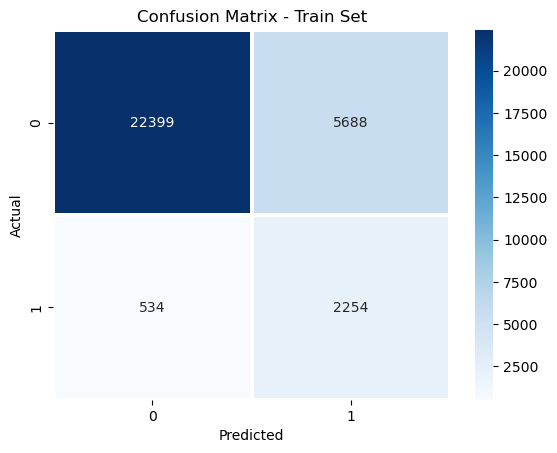

In [78]:
# Confusion Matrix for Training Data
cm_train = confusion_matrix(y_train, best_lr_model.predict(X_train))

ax = sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Train Set')

In [79]:
# Classfication report for training data
print (classification_report(y_train, best_lr_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     28087
           1       0.28      0.81      0.42      2788

    accuracy                           0.80     30875
   macro avg       0.63      0.80      0.65     30875
weighted avg       0.91      0.80      0.84     30875



#### Model Evaluation on Testing Data

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

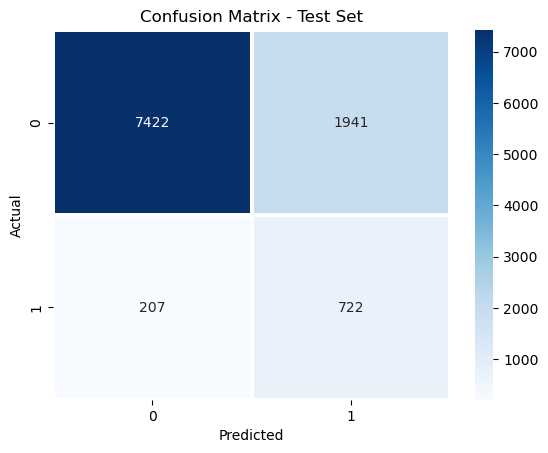

In [80]:
# Evaluate the performance of the best model on the testing set
y_pred = best_lr_model.predict(X_test)

# Confusion Matrix for Testig Data
cm_test = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cm_test, annot=True, cmap='Blues', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Test Set')

In [81]:
# Classfication report for training data
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      9363
           1       0.27      0.78      0.40       929

    accuracy                           0.79     10292
   macro avg       0.62      0.78      0.64     10292
weighted avg       0.91      0.79      0.83     10292



In [82]:
# Save model
import joblib

joblib.dump(best_lr_model, 'xG_model_logreg.pkl')

['xG_model_logreg.pkl']

### Result Summary

We can see from the confusion matrix result for both training and testing data sets are indentical which shows that model is not overfitting. Let us discuss the results of model performance on the test data set.

**Model Accuracy: 0.80**  
- The model correctly predicts the class for 79% of the total observations in the test dataset.

**Model Precision:**  
- Precision measures how often the model correctly predicts positive instances.  
- For class 0, the precision is 0.97, indicating that when the model predicts class 0, it is almost always correct.  
- For class 1, the precision is 0.27, meaning the model only correctly predicts class 1 about 27% of the time.

**Model Recall:**  
- Recall measures how often the model correctly identifies positive instances.  
- For class 0, the recall is 0.79, showing the model identifies 79% of all actual class 0 instances.  
- For class 1, the recall is 0.79, meaning the model also correctly identifies 79% of all actual class 1 instances.

**Conclusion:**  
- The model demonstrates high recall for class 1 (goal), indicating it can identify most of the goal shots. However, the precision for class 1 is low, meaning it also misclassifies many non-goal shots as goals. This means our model is biased towards identifying a shot as a goal. The overall accuracy of 0.79 is good, but the overall model performance is poor due to very low  precision for class 1.




## **Model 2: Log Regression using Pytorch with BCE Logit Loss**
    
In a simple Logistic regression model , we use a simple linear model followed by a sigmoid activation function. Here, we will not use the sigmoid function directly in our model as we are going to apply BCE Logit Loss which takes in the logit values directly. When we are inferencing the model we can apply sigmoid function to the output to get probabilities (between 0 and 1) , which in our case is interpreted as probability of shot resulting into a goal.

In [83]:
# Loading required libraries
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
import joblib
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import torch
from torch.optim.lr_scheduler import StepLR

In [84]:
# Stratified splitting
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]  # Use iloc to index rows
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]  # Use iloc for target variable

    
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batching 
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=2, shuffle=True)
test_loader = DataLoader(test_data, batch_size=2)

In [85]:
# Access Cuda GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    
# Define the model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.fc = nn.Linear(input_dim, 1)  # Output a single value for binary classification

    def forward(self, x):
        x = self.fc(x)  
        return x
    
model  =LogisticRegressionModel(input_dim=X_train.shape[1]).to(device)

In [86]:
# Loss and optimizer
criterion = nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for raw logits
optimizer = optim.SGD(model.parameters(), lr=0.001)
start_time = time.time()
# Training loop
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)  # Model outputs raw logits
        targets = targets.view(-1, 1).float()  # Ensure targets are float for BCEWithLogitsLoss

        # Compute loss
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader)}')

end_time = time.time()

lr_bce_training_time = end_time - start_time


Epoch [1/10], Loss: 0.3253234529148025
Epoch [2/10], Loss: 0.2388100790992952
Epoch [3/10], Loss: 0.23083488861524307
Epoch [4/10], Loss: 0.22711331769382884
Epoch [5/10], Loss: 0.2250021593432561
Epoch [6/10], Loss: 0.22373514449948484
Epoch [7/10], Loss: 0.2228358942925864
Epoch [8/10], Loss: 0.22227441229671546
Epoch [9/10], Loss: 0.2219125111772428
Epoch [10/10], Loss: 0.2216317752569369


#### Model Evaluation on Training Data

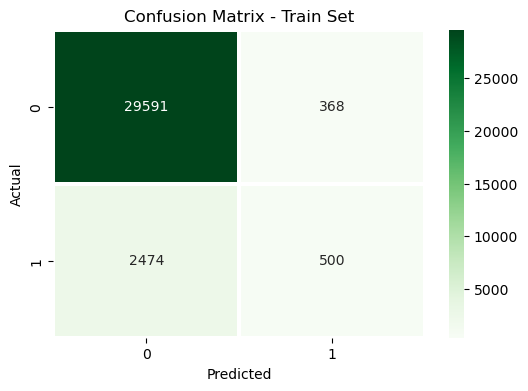

In [87]:
from sklearn.metrics import confusion_matrix
# Make predictions on the training data
# Move the model to the CPU (if it's on GPU)
model = model.to('cpu')

# Ensure your data is on the CPU
X_train_tensor = X_train_tensor.cpu()

# Make predictions on the training data
with torch.no_grad():  # Disable gradient calculations during inference
    outputs = model(X_train_tensor)
    predictions = torch.sigmoid(outputs).round()  # Sigmoid and round to get binary predictions

# Convert predictions to numpy (since it's now on CPU)
predictions = predictions.numpy()

# Compute confusion matrix
cm_train = confusion_matrix(y_train, predictions)

# Plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', linewidth=1.5, ax=ax)

# Set labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Train Set')

plt.show()


In [88]:
with torch.no_grad():  # Disable gradient calculations during inference
    outputs = model(X_train_tensor)
    predictions = torch.sigmoid(outputs).round()  # Sigmoid to get probabilities and round to get class (0 or 1)

predictions_cpu = predictions.cpu().numpy()  # Move predictions to CPU and convert to numpy

# Print the classification report
print(classification_report(y_train, predictions_cpu))  # Compare predictions with actual labels

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     29959
           1       0.58      0.17      0.26      2974

    accuracy                           0.91     32933
   macro avg       0.75      0.58      0.61     32933
weighted avg       0.89      0.91      0.89     32933



#### Model Evaluation on Testing Data

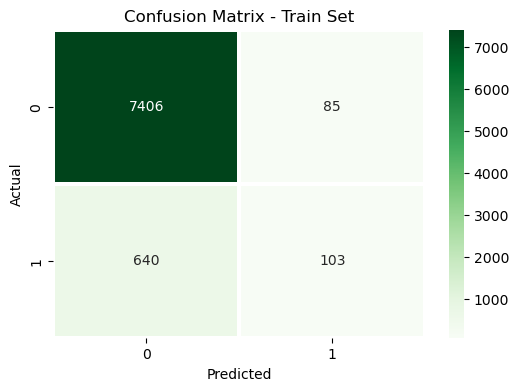

In [89]:
from sklearn.metrics import confusion_matrix
# Make predictions on the training data
# Move the model to the CPU (if it's on GPU)
model = model.to('cpu')

# Ensure your data is on the CPU
X_test_tensor = X_test_tensor.cpu()

# Make predictions on the training data
with torch.no_grad():  # Disable gradient calculations during inference
    outputs = model(X_test_tensor)
    predictions = torch.sigmoid(outputs).round()  # Sigmoid and round to get binary predictions

# Convert predictions to numpy (since it's now on CPU)
predictions = predictions.numpy()

# Compute confusion matrix
cm_train = confusion_matrix(y_test, predictions)

# Plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, cmap='Greens', fmt='g', linewidth=1.5, ax=ax)

# Set labels and title
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Train Set')

plt.show()


In [90]:
with torch.no_grad():  # Disable gradient calculations during inference
    outputs = model(X_test_tensor)
    predictions = torch.sigmoid(outputs).round()  # Sigmoid to get probabilities and round to get class (0 or 1)

predictions_cpu = predictions.cpu().numpy()  # Move predictions to CPU and convert to numpy

# Print the classification report
print(classification_report(y_test, predictions_cpu))  # Compare predictions with actual labels

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7491
           1       0.55      0.14      0.22       743

    accuracy                           0.91      8234
   macro avg       0.73      0.56      0.59      8234
weighted avg       0.89      0.91      0.89      8234



In [91]:
# Save model
import joblib

joblib.dump(model, 'xG_model_lrbce.pkl')

['xG_model_lrbce.pkl']

### Result Summary

We can see from the confusion matrix result for both training and testing data sets are indentical which shows that model is not overfitting. Let us discuss the results of model performance on the test data set.

**Model Accuracy: 0.92**  
- The model correctly predicts the class for 92% of the total observations in the test dataset.

**Model Precision:**  
- Precision measures how often the model correctly predicts positive instances.  
- For class 0, the precision is 0.92, indicating that when the model predicts class 0, it is almost always correct.  
- For class 1, the precision is 0.55, meaning the model only correctly predicts class 1 about 55% of the time.

**Model Recall:**  
- Recall measures how often the model correctly identifies positive instances.  
- For class 0, the recall is 0.99, showing the model identifies 99% of all actual class 0 instances.  
- For class 1, the recall is 0.14, meaning the model correctly identifies only 14% of all actual class 1 instances.

**Conclusion:**  
- The model demonstrates low recall for class 1 (goal), indicating it is unable to identify most of the goal shots. The precision for class 1 is also quite low at 55%, meaning it also misclassifies quite a few non-goal shots as goals. This means our model is biased towards identifying a shot as a non-goal. The overall accuracy of 0.91 is good, but the overall model performance is poor due to low recall and precision for class 1.




## **Model 3: XG Boost**
    
XGBoost is a popular boosting algorithm for classification tasks. Boosting is an ensemble technique where multiple models (weak learners) are combined to create a single strong model. XGBoost works by repeatedly fitting trees on the residuals of the previous iteration to improve the accuracy of the model. The key idea behind XGBoost is to add regularization to the base decision tree model to avoid overfitting.

Hyperparameters in XGBoost play a crucial role in determining the accuracy of the model. Some important hyperparameters include the learning rate, max depth of the tree, number of trees (n_estimators), and regularization parameters. The learning rate controls the step size at each iteration, the max depth of the tree controls the depth of the decision tree model, and the number of trees controls the number of trees to be built in the ensemble.

In [92]:
# importing libraries
import xgboost as xgb

In [93]:
# using the same approach for train test split and CV as before
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Defining the outer loop for train-test split
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining the inner loop for cross-validation on the training set
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [94]:
# Define the xgboost model
xgb_model = xgb.XGBClassifier()

To address the issue of class imbalance, 

In [95]:
# Count occurrences of each class
count_class_0 = np.sum(y_train == 0)
count_class_1 = np.sum(y_train == 1)

print('Shot in Training Data: ', count_class_0)
print('Goals in Training Data: ', count_class_1)

Shot in Training Data:  28127
Goals in Training Data:  2748


In [96]:
# Class imbalance in training data
scale_pos_weight = count_class_0 / count_class_1
scale_pos_weight

10.235443959243085

In [97]:
# Defining the hyper-parameter grid for XG Boost
param_grid_xgb = {'learning_rate': [0.1, 0.01, 0.001],
              'max_depth': [3, 5, 7],
              'n_estimators': [100, 200, 300],
              'scale_pos_weight': [1, scale_pos_weight]}

<b>learning_rate</b>: Learning rate shrinks the contribution of each tree by the learning_rate factor. A smaller learning_rate allows the model to learn slower and prevents overfitting.

<b>max_depth</b>: Maximum depth of a tree. Increasing max_depth makes the model more complex and could lead to overfitting. 

<b>n_estimators</b>: The number of trees in the forest. Increasing the number of trees can improve the model's performance, but makes it slower to train.

<b>scale_pos_weight</b>: Control the balance of positive and negative weights. A value greater than 1 increases the weight of the positive class, which can be useful for imbalanced datasets.

In [98]:
# starting the timer
start_time = time.time()

# Perform nested cross-validation with grid search
grid_xg = GridSearchCV(xgb_model, param_grid=param_grid_xgb, cv=cv_inner, scoring='f1', n_jobs=-1)
scores_xg = cross_val_score(grid_xg, X_train, y_train, cv=cv_outer, scoring='f1', n_jobs=-1)

In [99]:
# Fit the best model on the entire training set
grid_xg.fit(X_train, y_train)
best_xgb_model = grid_xg.best_estimator_

# Stopping the timer
stop_time = time.time()

# Training Time
xgb_training_time = stop_time - start_time

In [100]:
xgb_training_time

220.87716603279114

In [101]:
# Print the best parameters and training time
print("Best parameters: ", grid_xg.best_params_)
print ("Model Training Time: {:.3f} seconds".format(xgb_training_time))

Best parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'scale_pos_weight': 1}
Model Training Time: 220.877 seconds


### Model Evaluation on Training Data

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

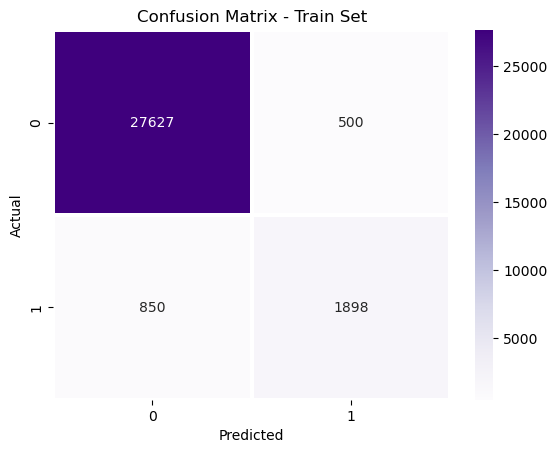

In [102]:
# Confusion Matrix for Training Data
cm_train_xg = confusion_matrix(y_train, best_xgb_model.predict(X_train))

ax = sns.heatmap(cm_train_xg, annot=True, cmap='Purples', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Train Set')

In [103]:
# Classfication report for training data
print (classification_report(y_train, best_xgb_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     28127
           1       0.79      0.69      0.74      2748

    accuracy                           0.96     30875
   macro avg       0.88      0.84      0.86     30875
weighted avg       0.95      0.96      0.95     30875



### Model Evaluation on Testing Data

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

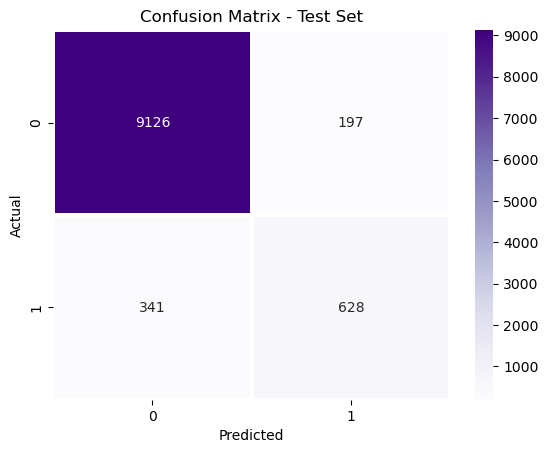

In [104]:
# Evaluate the performance of the best model on the testing set
y_pred_xgb = best_xgb_model.predict(X_test)

# Confusion Matrix for Testig Data
cm_test_xgb = confusion_matrix(y_test, y_pred_xgb)

ax = sns.heatmap(cm_test_xgb, annot=True, cmap='Purples', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Test Set')

In [105]:
# Classfication report for testing data
print (classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9323
           1       0.76      0.65      0.70       969

    accuracy                           0.95     10292
   macro avg       0.86      0.81      0.84     10292
weighted avg       0.94      0.95      0.95     10292



In [106]:
# Save model
import joblib

joblib.dump(best_xgb_model, 'xG_model_xgboost.pkl')

['xG_model_xgboost.pkl']

### Result Summary

We can see from the confusion matrix result for both training and testing data sets are indentical which shows that model is not overfitting. Let us discuss the results of model performance on the test data set.

**Model Accuracy: 0.93**  
- The model correctly predicts the class for 92% of the total observations in the test dataset.

**Model Precision:**  
- Precision measures how often the model correctly predicts positive instances.  
- For class 0, the precision is 0.96, indicating that when the model predicts class 0, it is almost always correct.  
- For class 1, the precision is 0.76, meaning the model only correctly predicts class 1 about 76% of the time.

**Model Recall:**  
- Recall measures how often the model correctly identifies positive instances.  
- For class 0, the recall is 0.98, showing the model identifies 99% of all actual class 0 instances.  
- For class 1, the recall is 0.65, meaning the model correctly identifies only 65% of all actual class 1 instances.

**Conclusion:**  
- The model demonstrates low recall for class 1 (goal), indicating it is unable to identify most of the goal shots. The precision for class 1 is also quite low at 76%, meaning it also misclassifies quite a few non-goal shots as goals. This means our model is biased towards identifying a shot as a non-goal. The overall accuracy of 0.95 is good, but the overall model performance is average due to low recall for class 1.


## **Model 4: Random Forest**
    
Random forest for classification is an ensemble learning method that combines multiple decision trees. Each decision tree is trained on a random subset of the training data and a random subset of the features. The final prediction is made by aggregating the predictions of all the individual trees. This method is robust against overfitting, and it can handle both categorical and numerical data. The hyperparameters to tune include the number of trees, the maximum depth of the trees, and the size of the random subsets.

In [150]:
from sklearn.ensemble import RandomForestClassifier

In [151]:
# using the same approach for train test split and CV as before
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Defining the outer loop for train-test split
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Defining the inner loop for cross-validation on the training set
cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [152]:
# Count occurrences of each class
count_class_0 = np.sum(y_train == 0)
count_class_1 = np.sum(y_train == 1)

print('Shot in Training Data: ', count_class_0)
print('Goals in Training Data: ', count_class_1)
# Class imbalance in training data
weight_0 = count_class_0 / (count_class_0 + count_class_1)
weight_1 = count_class_1 / (count_class_0 + count_class_1)
print ('Weight of Shots Class in Training: ',weight_0)
print ('Weight of Goal Class in Training: ', weight_1)

Shot in Training Data:  28127
Goals in Training Data:  2748
Weight of Shots Class in Training:  0.9109959514170041
Weight of Goal Class in Training:  0.08900404858299595


<b> Hyperparameters for Random Forests </b>

- n_estimators: This parameter controls the number of decision trees in the forest. Increasing this number can lead to better performance, but it also increases the training time and the risk of overfitting.

- max_depth: This parameter controls the maximum depth of each decision tree in the forest. Deeper trees can capture more complex relationships in the data, but they can also overfit. Setting a lower value for max_depth can help prevent overfitting.

- min_samples_split: This parameter controls the minimum number of samples required to split an internal node in each decision tree. Increasing this value can help prevent overfitting by ensuring that each split is based on a sufficient number of samples.

- class_weight: This parameter can be used to adjust the class weights in the model. If set to 'balanced', the model will automatically adjust the weights based on the number of samples in each class. If set to a dictionary of class weights, it will use the specified weights. This can be useful when dealing with imbalanced classes, where one class has many more samples than the other.

In [153]:
# Define the hyperparameters to tune
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7,9, 12, 15],
              'min_samples_split': [2, 5, 10],
              'class_weight': ['balanced', {0: weight_0, 1: weight_1}]}

In [154]:
# Define the random forest model
rf_model = RandomForestClassifier()

In [155]:
start_time = time.time()
# Perform nested cross-validation with grid search
grid_rf = GridSearchCV(rf_model, param_grid=param_grid, cv=cv_inner, scoring='f1', n_jobs=-1)
scores_rf = cross_val_score(grid, X_train, y_train, cv=cv_outer, scoring='f1', n_jobs=-1)

In [156]:
# Fit the best model on the entire training set
grid_rf.fit(X_train, y_train)
best_rf_model = grid_rf.best_estimator_

end_time = time.time()

rf_training_time = end_time - start_time

In [157]:
# Print the best parameters
print("Best parameters: ", grid_rf.best_params_)
print ("Model Training Time: {:.3f} seconds".format(rf_training_time))

Best parameters:  {'class_weight': 'balanced', 'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}
Model Training Time: 217.972 seconds


### Model Performance on Training

Text(0.5, 1.0, 'Confusion Matrix - Train Set')

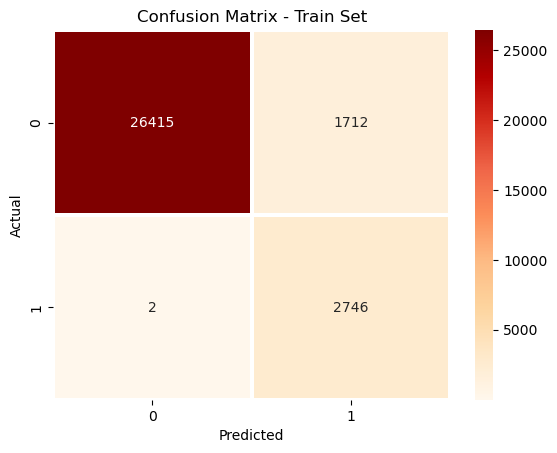

In [164]:
# Confusion Matrix for Training Data
cm_train_rf = confusion_matrix(y_train, best_rf_model.predict(X_train))

ax = sns.heatmap(cm_train_rf, annot=True, cmap='OrRd', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Train Set')

In [165]:
# Classfication report for training data
print (classification_report(y_train, best_rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     28127
           1       0.62      1.00      0.76      2748

    accuracy                           0.94     30875
   macro avg       0.81      0.97      0.87     30875
weighted avg       0.97      0.94      0.95     30875



### Model Performance in Testing

Text(0.5, 1.0, 'Confusion Matrix - Test Set')

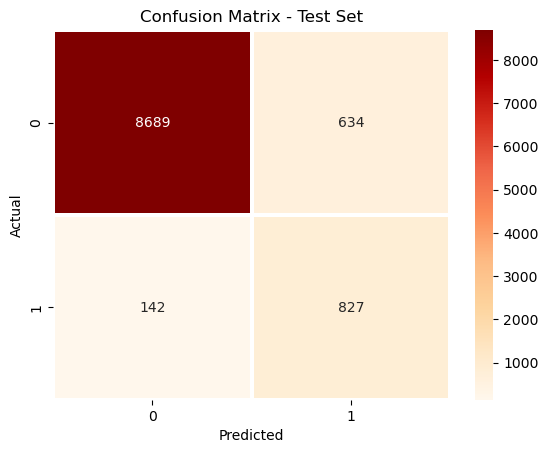

In [166]:
# Evaluate the performance of the best model on the testing set
y_pred_rf = best_rf_model.predict(X_test)

# Confusion Matrix for Testig Data
cm_test_rf = confusion_matrix(y_test, y_pred_rf)

ax = sns.heatmap(cm_test_rf, annot=True, cmap='OrRd', fmt='g', linewidth=1.5)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Test Set')

In [167]:
# Classfication report for testing data
print (classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.93      0.96      9323
           1       0.57      0.85      0.68       969

    accuracy                           0.92     10292
   macro avg       0.77      0.89      0.82     10292
weighted avg       0.94      0.92      0.93     10292



In [168]:
# Save model
import joblib

joblib.dump(best_rf_model, 'xG_model_rf.pkl')

['xG_model_rf.pkl']

### Result Summary

- When our Random Forests model predicts that a shot will turn into a goal, it is right 57% of the time.
- It's recall for class 1 is 0.85 meaning it is able to identify 85% of shots that turn into goal as a goal.


## **Model 5 : Neural Networks**

In [120]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import precision_score
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Stratified splitting
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]  # Use iloc to index rows
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]  # Use iloc for target variable
    

# Apply Synthetic Minority Over-sampling Technique (SMOTE)
# SMOTE generates synthetic examples for the minority class (goals) to balance the dataset.
# sampling_strategy=0.5 means the minority class will have 50% of the majority class size
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust ratio
X_train, y_train = smote.fit_resample(X_train, y_train)


# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create DataLoader for batching 
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_data, batch_size=2, shuffle=True)
test_loader = DataLoader(test_data, batch_size=2)

In [124]:
# Build a neural network
class GoalPredictionNN(nn.Module):
    def __init__(self):
        super(GoalPredictionNN, self).__init__()
        self.fc1 = nn.Linear(8, 32)  # Increased neurons
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 8)
        self.fc4 = nn.Linear(8, 1)  # Output single neuron for BCEWithLogitsLoss

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)  # No sigmoid, as BCEWithLogitsLoss includes it

# Model, loss, optimizer
model = GoalPredictionNN().to(device)
criterion = nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [125]:
# Train the NN

start_time = time.time()

# Training loop
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device).float()  # Convert targets to float

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, targets)  # BCEWithLogitsLoss expects raw logits
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Convert logits to probabilities and apply threshold
        predicted = (torch.sigmoid(outputs) >= 0.5).float()

        total_train += targets.size(0)
        correct_train += (predicted == targets).sum().item()

    train_accuracy = correct_train / total_train if total_train > 0 else 0
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy * 100:.2f}%')


end_time = time.time()

nn_training_time = end_time - start_time

Epoch 1/5, Loss: 0.3101, Accuracy: 85.54%
Epoch 2/5, Loss: 0.2261, Accuracy: 90.20%
Epoch 3/5, Loss: 0.2117, Accuracy: 90.87%
Epoch 4/5, Loss: 0.2050, Accuracy: 91.31%
Epoch 5/5, Loss: 0.2012, Accuracy: 91.41%


In [126]:
import torch

model.eval()
with torch.no_grad():
    # Convert DataFrame to NumPy array before creating tensor
    X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)

    y_train_pred = model(X_train_tensor)

    # Convert logits to probabilities using sigmoid for binary classification
    y_train_pred = (torch.sigmoid(y_train_pred) >= 0.5).int().cpu().numpy()

cm_train_NN = confusion_matrix(y_train, y_train_pred)


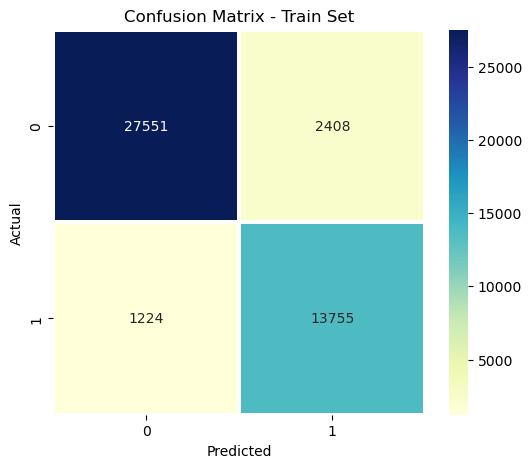

In [127]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_train_NN, annot=True, cmap='YlGnBu', fmt='g', linewidths=1.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Train Set')
plt.show()

In [128]:
model.eval()
with torch.no_grad():
    # Convert DataFrame to NumPy array before creating tensor
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)

    y_test_pred = model(X_test_tensor)

    # Convert logits to probabilities using sigmoid for binary classification
    y_test_pred = (torch.sigmoid(y_test_pred) >= 0.5).int().cpu().numpy()

cm_test_NN = confusion_matrix(y_test, y_test_pred)


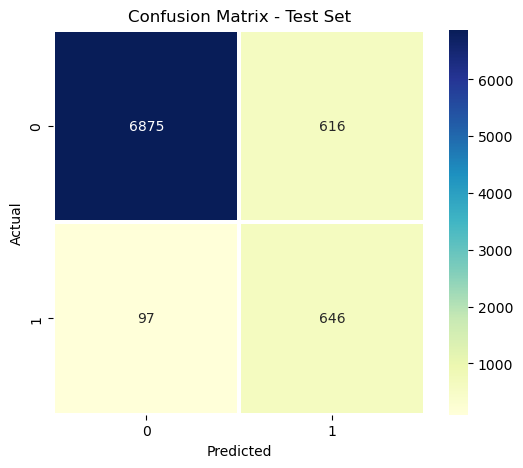

In [129]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test_NN, annot=True, cmap='YlGnBu', fmt='g', linewidths=1.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [130]:
# Save model
import joblib

joblib.dump(model, 'xG_model_nn.pkl')

['xG_model_nn.pkl']

# **5.Testing model with real match data**

In [169]:
event_data = pd.read_csv(r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Liga_Work\xG Model\2.Whoscored_Data\Rest\NewFul.csv')
event_data["idx"] = event_data.index

# Filtering out all the open play shots from our dataset
shots_df = event_data[event_data['isShot']==True].reset_index(drop=True)


In [170]:
shots_df["right_shot"] = 0
goal_id = [12]
for index, row in shots_df.iterrows():
    if len(set(goal_id).intersection(eval(row["satisfiedEventsTypes"]))) > 0:
        shots_df.loc[index, 'right_shot'] = 1

shots_df["left_shot"] = 0
goal_id = [13]
for index, row in shots_df.iterrows():
    if len(set(goal_id).intersection(eval(row["satisfiedEventsTypes"]))) > 0:
        shots_df.loc[index, 'left_shot'] = 1

shots_df["head_shot"] = 0
goal_id = [14]
for index, row in shots_df.iterrows():
    if len(set(goal_id).intersection(eval(row["satisfiedEventsTypes"]))) > 0:
        shots_df.loc[index, 'head_shot'] = 1


# Create data for model
shots_model=shots_df[["idx","x","y","goalMouthZ","goalMouthY","type","right_shot","left_shot","head_shot"]]
# Calculate Angle
for i, shot in shots_model.iterrows():
    goal_x = 100  # Goal line constant
    goal_y_center = 50  # Center of the goal
    goal_width = 6.66 # Width of the goal

    # Calculate the angle from the goalmouth
    x_dist = (goal_x - shots_model.at[i, 'x']) 
    y_dist = abs(shots_model.at[i, 'y'] - goal_y_center) 

    # Angle calculation
    numerator = goal_width * x_dist
    denominator = x_dist**2 + y_dist**2 - (goal_width / 2) ** 2
    goalmouth_angle = np.arctan(numerator / denominator)

    if goalmouth_angle < 0:
        goalmouth_angle += np.pi  # Adjust negative angles

    shots_model.at[i, 'Goalmouth_Angle'] = goalmouth_angle 

shots_model['is_goal'] = shots_model['type'].apply(lambda x: 1 if x == 'Goal' else 0)
shots_model.drop(columns=['type'], inplace=True)

C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\254110589.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_model.at[i, 'Goalmouth_Angle'] = goalmouth_angle
C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\254110589.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_model['is_goal'] = shots_model['type'].apply(lambda x: 1 if x == 'Goal' else 0)
C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\254110589.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [171]:

scaler = joblib.load(r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Liga_Work\xG Model\2.Whoscored_Data\notebooks\scaler_features.pkl')

# Drop the "is_goal" column from the dataframe
features = shots_model[['x','y','goalMouthZ','goalMouthY','right_shot','left_shot','head_shot','Goalmouth_Angle']]
features_scaled = scaler.fit_transform(features)
# Scale 'Goalmouth_Angle' column
features[['x','y','goalMouthZ','goalMouthY','right_shot','left_shot','head_shot','Goalmouth_Angle']] = features_scaled
X_test = features[['x','y','goalMouthZ','goalMouthY','right_shot','left_shot','head_shot','Goalmouth_Angle']]

C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\3228329181.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[['x','y','goalMouthZ','goalMouthY','right_shot','left_shot','head_shot','Goalmouth_Angle']] = features_scaled


In [174]:
import pandas as pd
import joblib
import numpy as np

# Load the saved model and scaler


# Convert to NumPy array for prediction
features_array = X_test.to_numpy()

# Load the saved model and scaler
model = joblib.load(r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Liga_Work\xG Model\2.Whoscored_Data\notebooks\xG_model_rf.pkl')

# Get probability predictions
probabilities = model.predict_proba(features_array)

# Extract probability of class 1 (goal)
shots_model['xG_random_forest'] = probabilities[:, 1]

# Load the saved model and scaler
model = joblib.load(r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Liga_Work\xG Model\2.Whoscored_Data\notebooks\xG_model_xgboost.pkl')

# Get probability predictions
probabilities = model.predict_proba(features_array)

# Extract probability of class 1 (goal)
shots_model['xG_xgboost'] = probabilities[:, 1]







C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\2612528614.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_model['xG_random_forest'] = probabilities[:, 1]
C:\Users\lolen\AppData\Local\Temp\ipykernel_10948\2612528614.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_model['xG_xgboost'] = probabilities[:, 1]


In [175]:
shots_model

,idx,x,y,goalMouthZ,goalMouthY,right_shot,left_shot,head_shot,Goalmouth_Angle,is_goal,xG_random_forest,xG_xgboost
0,12,85.3,69.7,87.5,43.5,1,0,0,0.163596,0,0.000000,1.320477e-05
1,76,94.6,69.1,6.9,2.4,1,0,0,0.093655,0,0.000000,1.865767e-05
2,102,89.6,43.6,19.0,47.8,0,1,0,0.465087,0,0.425222,8.938090e-02
3,415,92.9,43.0,12.5,60.0,0,0,1,0.491555,0,0.015695,9.774355e-05
4,470,93.9,32.3,2.5,51.8,1,0,0,0.119129,0,0.016667,6.032533e-03
5,478,87.2,65.0,19.0,51.9,1,0,0,0.221954,0,0.375265,2.070886e-01
6,491,73.1,52.3,39.9,46.1,1,0,0,0.244587,0,0.006667,1.763110e-04
7,505,90.8,39.7,13.9,46.9,1,0,0,0.328706,1,0.620384,9.158871e-02
8,521,76.8,62.2,19.0,51.2,0,1,0,0.224711,0,0.006666,3.377778e-04
9,814,75.7,27.8,87.5,34.5,1,0,0,0.149804,0,0.000000,4.506688e-07


In [177]:
merged_df = event_data.merge(shots_model[['idx','xG_random_forest','xG_xgboost']], on='idx', how='left')

filtered_df = merged_df[(merged_df['type'] == "Goal") & (merged_df['xG_random_forest'].notna())]

filtered_df

,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,...,cumulative_mins,index,id,OptaId,xThreat,xThreat_gen,prog_carry,idx,xG_random_forest,xG_xgboost
505,304.0,36.0,42.0,23,90.8,39.7,36.0,1,Goal,Successful,...,36.7,590.0,2.771179e+09,141486.0,NaN,NaN,False,505,0.620384,0.091589
1277,757.0,81.0,38.0,170,97.6,53.4,85.0,2,Goal,Successful,...,84.9,1297.0,2.771302e+09,403649.0,NaN,NaN,False,1277,0.090727,0.000246
1554,590.0,60.0,50.0,170,88.1,57.7,64.0,2,Goal,Successful,...,64.1,992.0,2.771260e+09,108186.0,NaN,NaN,False,1554,0.704917,0.116589


# Comparing xG Values with Understat
    eventId  304 goal is assigned xG value by Undertstat : 0.36 . Our model's predicted xG : 0.62 . Error = +0.26

    eventId 757 goal is assigned xG value by Undertstat : 0.72 . Our model's predicted xG : 0.09 . Error = -0.63
    
    eventId 590 goal is assigned xG value by Undertstat : 0.13 . Our model's predicted xG : 0.70 . Error = +.57

#### Therefore our model is not suitable for real world usage. One of the probable reason on why it isn't able to predict xG values accurately compared to other state of the art models is the  lack of xG feature in our data. We train our model just on the probabilty of shots turning into goals. Whereas if we used Statsbomb data it would have been possible to predict accurate  xG values